# **Marketing Campaign Analysis Project**




**Problem Scenario**

Marketing mix stands as a widely utilized concept in the execution of marketing
strategies. It encompasses various facets within a comprehensive marketing plan,
with a central focus on the four Ps of marketing: product, price, place, and
promotion.

**Problem Objective**

As a data scientist, you must conduct exploratory data analysis and hypothesis
testing to enhance your comprehension of the diverse factors influencing customer
acquisition.

**Hypothesis**

In this analysis, we explore the factors influencing customer acquisition, using various marketing channels. The following hypotheses are tested:

- **Older individuals** may prefer traditional in-store shopping.
- **Customers with children** are more likely to shop online.
- Sales channels may experience **cannibalization**.



In [32]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## **Import Libraries & Packages**

In [33]:
# Install Packages
!pip install scikit-learn-extra
!pip install yellowbrick


# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import ttest_ind
#from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [34]:
import sys
print(sys.executable)

/usr/local/bin/python3.10


## **Data Overview**

**Data Dictionary**

In [35]:
dd = pd.read_excel('Data Dictionary - Response to marketing campaigns.xlsx')
dd.head(28)

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,number of small children in customer's househo...
6,Teenhome,no of teenagers in customer's house
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,number of days since the last purchase
9,MntWines,amount spent on wine in last 2 years


In [36]:
dd.shape

(28, 2)

In [37]:
df = pd.read_csv('marketing_data.csv')


In [38]:
df.shape

(2240, 28)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [40]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [41]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [42]:
no_null_columns = df.columns[df.isnull().sum() == 0].tolist()

print("Columns with no null values:")
for col in no_null_columns:
    print(col)
    
#Checking for columns that do not have null values

Columns with no null values:
ID
Year_Birth
Education
Marital_Status
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Response
Complain
Country


In [43]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values in each column:")
    print(missing_values)
    
#Showing columns with missing values and number of missing values

Missing values in each column:
 Income     24
dtype: int64


In [44]:
duplicate_counts = df.apply(lambda col: col.duplicated().sum())

duplicate_counts = duplicate_counts[duplicate_counts > 0]

if duplicate_counts.empty:
    print("No duplicated values found in any column.")
else:
    print("Duplicated values in each column:")
    for col, count in duplicate_counts.items():
        print(f'Column "{col}": {count} duplicated value(s)')

#Show columns that are duplicated

Duplicated values in each column:
Column "Year_Birth": 2181 duplicated value(s)
Column "Education": 2235 duplicated value(s)
Column "Marital_Status": 2232 duplicated value(s)
Column " Income ": 265 duplicated value(s)
Column "Kidhome": 2237 duplicated value(s)
Column "Teenhome": 2237 duplicated value(s)
Column "Dt_Customer": 1577 duplicated value(s)
Column "Recency": 2140 duplicated value(s)
Column "MntWines": 1464 duplicated value(s)
Column "MntFruits": 2082 duplicated value(s)
Column "MntMeatProducts": 1682 duplicated value(s)
Column "MntFishProducts": 2058 duplicated value(s)
Column "MntSweetProducts": 2063 duplicated value(s)
Column "MntGoldProds": 2027 duplicated value(s)
Column "NumDealsPurchases": 2225 duplicated value(s)
Column "NumWebPurchases": 2225 duplicated value(s)
Column "NumCatalogPurchases": 2226 duplicated value(s)
Column "NumStorePurchases": 2226 duplicated value(s)
Column "NumWebVisitsMonth": 2224 duplicated value(s)
Column "AcceptedCmp3": 2238 duplicated value(s)
C

## **Data Cleaning & Wrangling**

In [45]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [46]:
df.columns = df.columns.str.strip()

In [47]:
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check the first few rows of the dataframe to ensure it's cleaned up
print(df.head())

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0     6/16/14        0       189  ...                  6                  1   
1     6/15/14        0       464  ...                  7                  5   
2     5/13/14        0       134  ...                  5                  2   
3     5/11/14        0        10  ...                  2                  7   
4      4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Accep

In [48]:
df['Education'] = df['Education'].str.strip()  # Remove extra spaces if any
df['Marital_Status'] = df['Marital_Status'].str.strip()


#Calculate the average income for each combination of Education and Marital Status
# Group by 'Education' and 'Marital_Status' and calculate the mean income
avg_income = df.groupby(['Education', 'Marital_Status'])['Income'].mean()

# Replace missing Income values with the calculated average income for each group
def impute_income(row):
    if pd.isnull(row['Income']):
        # Get the average income for the same Education and Marital_Status group
        return avg_income.loc[(row['Education'], row['Marital_Status'])]
    else:
        return row['Income']

df['Income'] = df.apply(impute_income, axis=1)

# Check if there are still missing values
print(df['Income'].isnull().sum())

0


In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [50]:
df = df.drop(columns=['ID'])

In [51]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52248.748825,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,25039.981052,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Exploratory Data Analysis**

In [55]:
import datetime

# Feature engineering using already existing variables and columns

# Creating a Total number of children column
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Creating an Age column
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Creating a Total spending column
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)

In [56]:
df.head()

# View the first few rows of the data with the added columns

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,0,0,0,1,0,SP,0,55,1190,14
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,0,1,1,0,CA,0,64,577,17
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,0,US,1,67,251,10
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,0,AUS,2,58,11,3
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,0,0,0,1,0,SP,1,36,91,6


In [57]:
# Create total purchases column by summing up the transactions across the three channels
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


In [58]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,0,0,0,1,0,SP,0,55,1190,14
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,0,1,1,0,CA,0,64,577,17
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,0,US,1,67,251,10
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,0,AUS,2,58,11,3
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,0,0,0,1,0,SP,1,36,91,6


In [59]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique value counts and value frequencies for each categorical column
for col in categorical_cols:
    unique_count = df[col].nunique()
    value_counts = df[col].value_counts()

    print(f'Column: {col}')
    print(f'Unique Values: {unique_count}')
    print('Value Counts:')
    print(value_counts)
    print('-' * 40)  # Separator for readability

Column: Education
Unique Values: 5
Value Counts:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
----------------------------------------
Column: Marital_Status
Unique Values: 8
Value Counts:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
----------------------------------------
Column: Dt_Customer
Unique Values: 663
Value Counts:
8/31/12    12
9/12/12    11
2/14/13    11
5/12/14    11
8/20/13    10
           ..
9/5/12      1
11/9/13     1
5/16/13     1
7/20/13     1
9/1/12      1
Name: Dt_Customer, Length: 663, dtype: int64
----------------------------------------
Column: Country
Unique Values: 8
Value Counts:
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64
----------------------------------------


In [60]:
# Replace 'Alone' with 'Single' in 'Marital_Status'
df['Marital_Status'].replace('Alone', 'Single', inplace=True)

# Remove rows where 'Marital_Status' is 'Absurd' or 'YOLO'
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Replace '2n Cycle' with 'Master' in 'Education'
df['Education'].replace('2n Cycle', 'Master', inplace=True)

# Verify changes
print("Marital Status Value Counts:")
print(df['Marital_Status'].value_counts())
print("\nEducation Value Counts:")
print(df['Education'].value_counts())

Marital Status Value Counts:
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

Education Value Counts:
Graduation    1126
Master         572
PhD            484
Basic           54
Name: Education, dtype: int64


### **Box Plots & Histograms** 

Generate box plots and histograms to gain insights into the distributions and
identify outliers. Implement outlier treatment as needed.


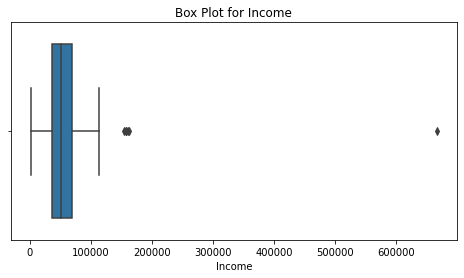

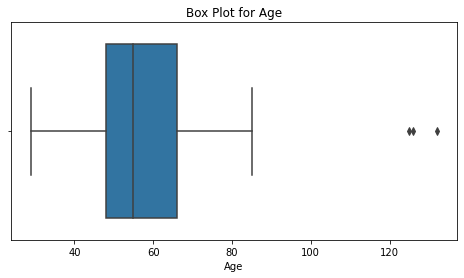

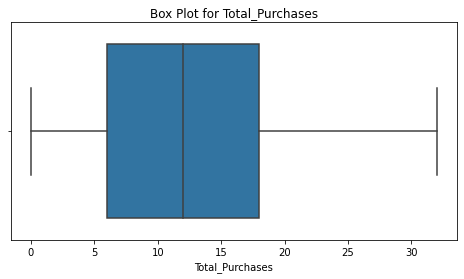

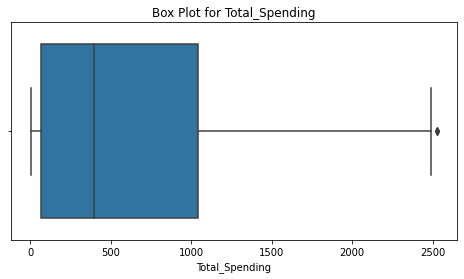

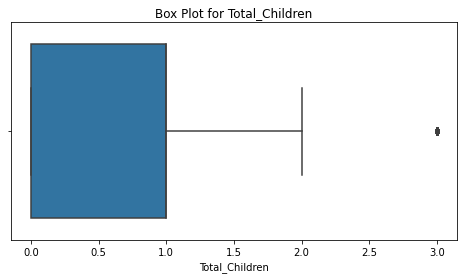

In [61]:
numerical_columns = ['Income', 'Age', 'Total_Purchases', 'Total_Spending', 'Total_Children']

# Box Plots
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.show()


Income has zero skewness, suggesting symmetric distibution with a median Income of 51381.5
Age has zero skewness, suggesting symmetric distibution with a median Age of 55
Total Purchases has positive skewness with a median of 12
Total Spending is positively skewed with a median of 395
Total children is positively skewed with a median of 1



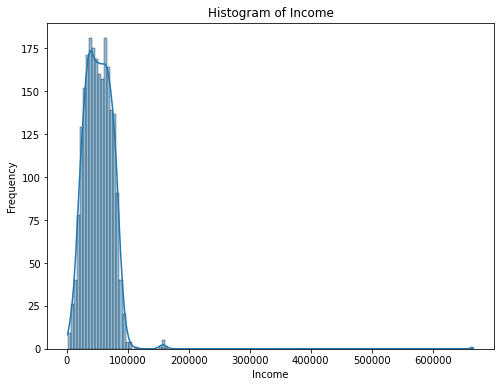

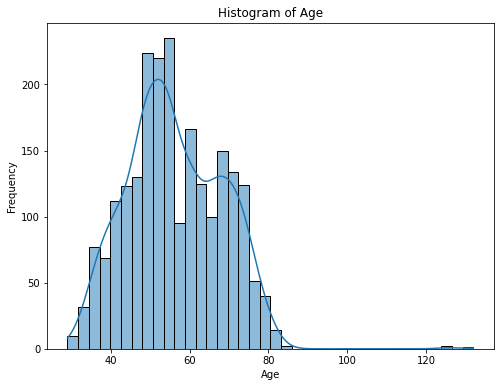

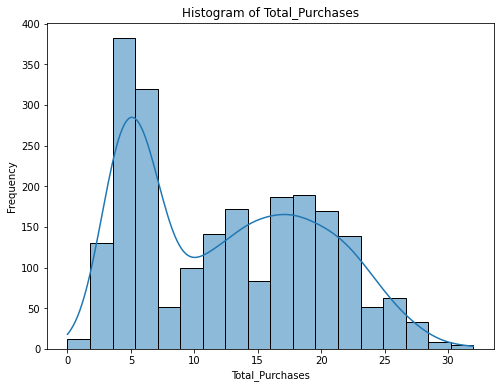

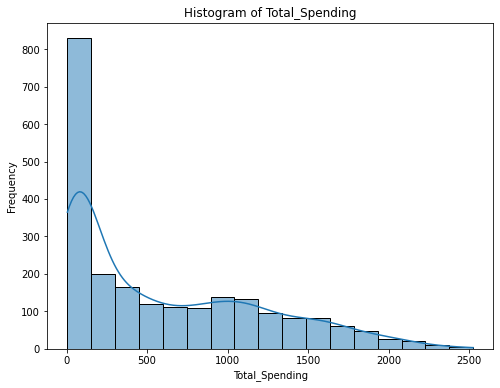

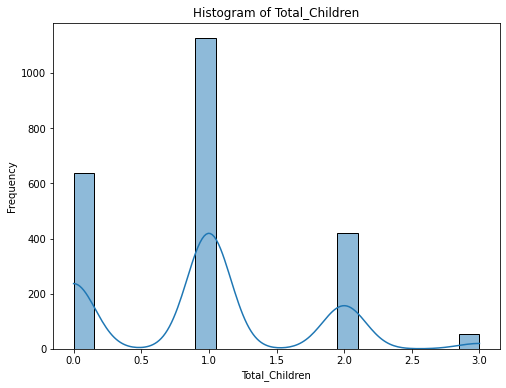

Outliers removed from Income: 8
Outliers removed from Age: 3
Outliers removed from Total_Purchases: 0
Outliers removed from Total_Spending: 3
Outliers removed from Total_Children: 53


In [62]:
columns_to_plot = ['Income', 'Age', 'Total_Purchases', 'Total_Spending', 'Total_Children'] 


for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # KDE helps visualize the distribution shape
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Outlier Treatment 
for col in columns_to_plot:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"Outliers removed from {col}: {len(df) - len(df_filtered)}")



In [63]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Children',
       'Age', 'Total_Spending', 'Total_Purchases'],
      dtype='object')


### **Ordinal & Nominal Columns**

Apply ordinal and one-hot encoding based on the various types of categorical
variables.

In [64]:
ordinal_cols = ['Education']  
nominal_cols = ['Marital_Status']

education_mapping = {'Graduation': 4, 'PhD': 3, 'Master': 2, 'Basic': 1}
marital_mapping = {'Married': 1, 'Together': 0, 'Single': 0, 'Divorced': 0} 

#Ordinal Columns
for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].map(education_mapping)
    else:
        print(f"Column '{col}' not found in DataFrame.")

#Nominal Columns
for col in nominal_cols:
    if col in df.columns:
        df[col] = df[col].map(marital_mapping)  # Reassign the mapped values
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Apply One-Hot Encoding
# Create dummy variables for nominal columns
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [65]:
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases,Marital_Status_1.0
0,1970,4,84835.0,0,0,6/16/14,0,189,104,379,...,0,0,1,0,SP,0,55,1190,14,0
1,1961,4,57091.0,0,0,6/15/14,0,464,5,64,...,0,1,1,0,CA,0,64,577,17,0
2,1958,4,67267.0,0,1,5/13/14,0,134,11,59,...,0,0,0,0,US,1,67,251,10,1
3,1967,4,32474.0,1,1,5/11/14,0,10,0,1,...,0,0,0,0,AUS,2,58,11,3,0
4,1989,4,21474.0,1,0,4/8/14,0,6,16,24,...,0,0,1,0,SP,1,36,91,6,0


### **HeatMap** 

Generate a heatmap to illustrate the correlation between different pairs of
variables.

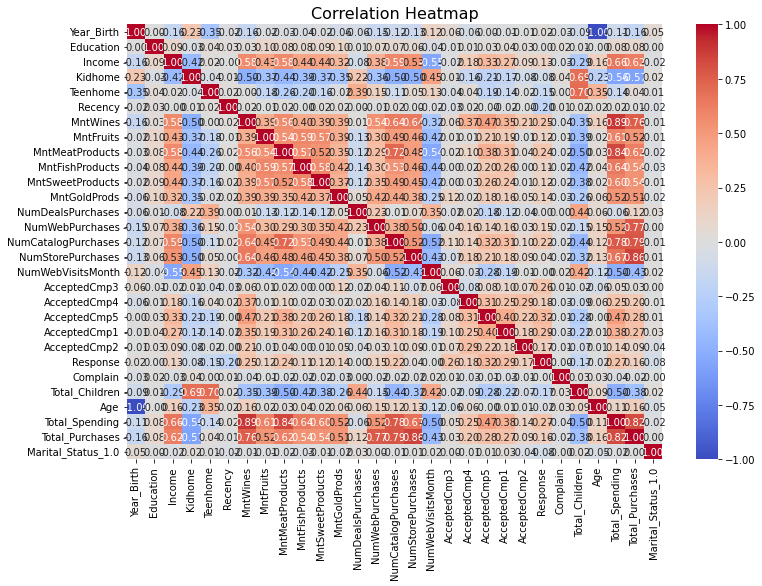

In [66]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,         # Show the correlation values
            fmt=".2f",          # Format the values to 2 decimal places
            cmap="coolwarm",    # Colormap for better visualization
            cbar=True)          # Show color bar

# Set the title
plt.title('Correlation Heatmap', fontsize=16)

# Display the plot
plt.show()


### **Heatmap Observations:**

* **Strong Positive Correlations:**
    * Expenses & Amount_per_Purchase (0.82):  Indicates that as total expenses increase, the amount spent per purchase also       tends to increase.
    * NumTotalPurchases & NumWebPurchases (0.77): Suggests customers who buy more overall also tend to favor web purchases.
    * NumTotalPurchases & NumStorePurchases (0.86):  Shows a positive relationship between total purchases and in-store           purchases.
    * MntWines & Expenses (0.89): Wine purchases contribute significantly to total expenses.
    * MntMeatProducts & Expenses (0.84):  Meat product purchases also correlate with higher total expenses.

* **Moderate Positive Correlations:**
    * Income & Expenses (0.66):  Higher income is generally associated with higher spending.
    

* **Other Notable Correlations:**
    * NumCatalogPurchases & Income (0.53):  Customers with higher incomes tend to make more catalog purchases.

* **Weak or No Correlations:**
    * Most other pairs of variables show weak or no significant correlations.



### **Hypothesis Testing**

### **1.**

Older individuals may not possess the same level of technological
proficiency and may, therefore, lean toward traditional in-store shopping
preferences.

In [67]:

# Define age groups
young_threshold = 35  # Define the threshold for "older" individuals
df['Age_Group'] = np.where(df['Age'] <= young_threshold, 'Younger', 'Older')

# Group by Age_Group and calculate mean spending on in-store shopping
grouped_data = df.groupby('Age_Group')['NumStorePurchases'].mean()

print(grouped_data)

# Separate data for statistical testing
younger_group = df[df['Age_Group'] == 'Younger']['NumStorePurchases']
older_group = df[df['Age_Group'] == 'Older']['NumStorePurchases']

# Perform t-test
t_stat, p_value = ttest_ind(younger_group, older_group, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Older individuals and younger individuals differ in their in-store shopping preferences.")
else:
    print("Fail to reject the null hypothesis: No significant difference between older and younger individuals' in-store shopping preferences.")


Age_Group
Older      5.790901
Younger    5.733333
Name: NumStorePurchases, dtype: float64
T-Statistic: -0.14041709867894428
P-Value: 0.888781453696342
Fail to reject the null hypothesis: No significant difference between older and younger individuals' in-store shopping preferences.




### **2.**
Customers with children likely experience time constraints, making online
shopping a more convenient option.

In [68]:
# Combine catalogue and web purchases into a single 'online_purchases' variable
df['online_purchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases']
df['Has_Children'] = df['Total_Children'].apply(lambda x: 1 if x > 0 else 0)

# Assuming 'Has_Children' is a binary column (1 for yes, 0 for no)
# Group by 'Has_Children' and calculate the mean of online purchases
online_purchases_by_children = df.groupby('Has_Children')['online_purchases'].mean()


# Separate data into two groups: customers with children and without children
with_children = df[df['Has_Children'] == 1]['online_purchases']
without_children = df[df['Has_Children'] == 0]['online_purchases']

# Perform the t-test
t_stat, p_value = ttest_ind(with_children, without_children)

# Output the results
print(f"Online Purchases by Customers with Children: {online_purchases_by_children[1]}")
print(f"Online Purchases by Customers without Children: {online_purchases_by_children[0]}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is below 0.05 for significance
if p_value < 0.05:
    print("There is a significant difference in online shopping preferences between customers with and without children.")
else:
    print("There is no significant difference in online shopping preferences between customers with and without children.")


Online Purchases by Customers with Children: 5.78625
Online Purchases by Customers without Children: 9.14622641509434
T-statistic: -15.973141275576143
P-value: 1.814941472966919e-54
There is a significant difference in online shopping preferences between customers with and without children.


In [69]:
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases,Marital_Status_1.0,Age_Group,online_purchases,Has_Children
0,1970,4,84835.0,0,0,6/16/14,0,189,104,379,...,0,SP,0,55,1190,14,0,Older,8,0
1,1961,4,57091.0,0,0,6/15/14,0,464,5,64,...,0,CA,0,64,577,17,0,Older,10,0
2,1958,4,67267.0,0,1,5/13/14,0,134,11,59,...,0,US,1,67,251,10,1,Older,5,1
3,1967,4,32474.0,1,1,5/11/14,0,10,0,1,...,0,AUS,2,58,11,3,0,Older,1,1
4,1989,4,21474.0,1,0,4/8/14,0,6,16,24,...,0,SP,1,36,91,6,0,Older,4,1


In [70]:
print(df.columns)

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Total_Children', 'Age',
       'Total_Spending', 'Total_Purchases', 'Marital_Status_1.0', 'Age_Group',
       'online_purchases', 'Has_Children'],
      dtype='object')


### **3.** 
Sales at physical stores may face the risk of cannibalization by alternative
distribution channels.

Correlation matrix:
                   NumStorePurchases  online_purchases
NumStorePurchases           1.000000          0.615454
online_purchases            0.615454          1.000000


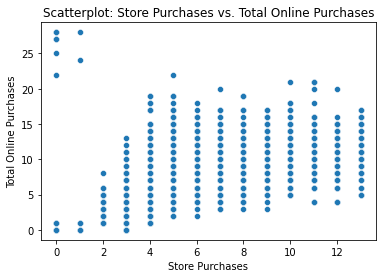

Spearman correlation: 0.7376642690721519
P-value: 0.0
There is a statistically significant relationship between store purchases and online purchases, indicating potential cannibalization.


In [71]:
# Calculate the total online purchases
df['online_purchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases']

# Correlation analysis
correlation = df[['NumStorePurchases', 'online_purchases']].corr()
print("Correlation matrix:")
print(correlation)

# Visualize the relationship using a scatterplot
sns.scatterplot(x=df['NumStorePurchases'], y=df['online_purchases'])
plt.title('Scatterplot: Store Purchases vs. Total Online Purchases')
plt.xlabel('Store Purchases')
plt.ylabel('Total Online Purchases')
plt.show()

# Hypothesis test (e.g., Spearman correlation)
spearman_corr, p_value = stats.spearmanr(df['NumStorePurchases'], df['online_purchases'])
print(f"Spearman correlation: {spearman_corr}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant relationship between store purchases and online purchases, indicating potential cannibalization.")
else:
    print("There is no statistically significant relationship between store purchases and online purchases.")

### **Question**

Does the United States significantly outperform the rest of the world in
total purchase volumes?


In [72]:
# Split the data into two groups: United States and Rest of the World
us_purchases = df[df['Country'] == 'United States']['Total_Purchases']
row_purchases = df[df['Country'] != 'United States']['Total_Purchases']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(us_purchases, row_purchases, equal_var=False)  # Assuming unequal variances

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The United States significantly outperforms the rest of the world in total purchase volumes.")
else:
    print("There is no significant difference in total purchase volumes between the United States and the rest of the world.")


T-statistic: nan
P-value: nan
There is no significant difference in total purchase volumes between the United States and the rest of the world.


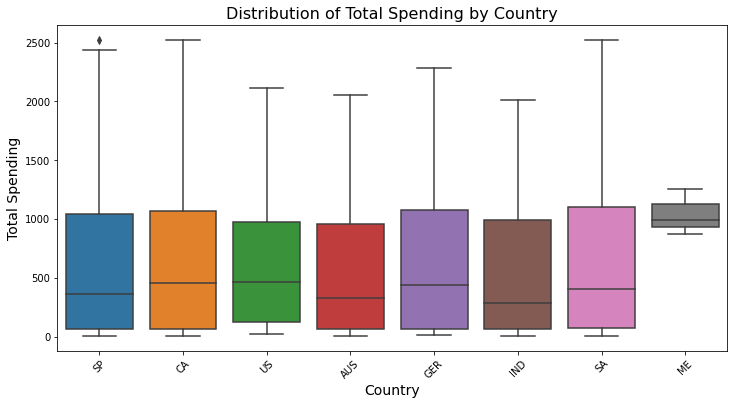

In [83]:

plt.figure(figsize=(12, 6))

# Create a box plot to show the distribution of Total Spending across different countries
sns.boxplot(x='Country', y='Total_Spending', data=df)

# Adding labels and title
plt.title('Distribution of Total Spending by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)

# Rotate the x-axis labels if needed (for better readability)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [73]:
print(df.columns)

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Total_Children', 'Age',
       'Total_Spending', 'Total_Purchases', 'Marital_Status_1.0', 'Age_Group',
       'online_purchases', 'Has_Children'],
      dtype='object')


### **Question**

Identify the top-performing products and those with the lowest revenue.

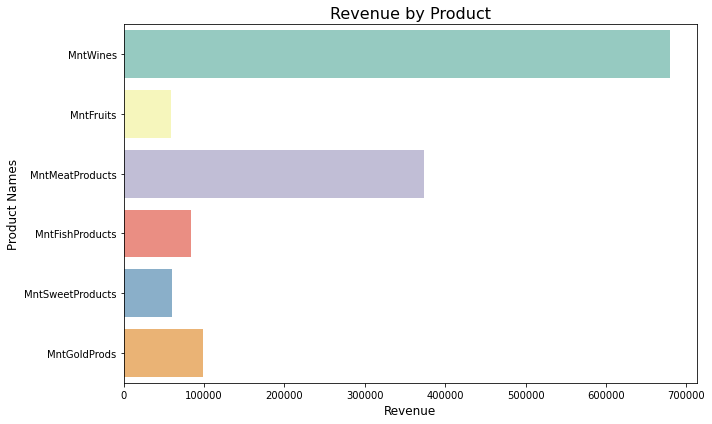

In [74]:
# Calculate total revenue for each product
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = df[product_columns].sum()

# Plotting the revenue for each product
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='Set3')
plt.title('Revenue by Product', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Product Names', fontsize=12)
plt.tight_layout()
plt.show()




MntWines shows that it is the product with the most revenue generated, with MntFruits being the second highest.
MntSweetProducts is shown to be the lowest bought product therefore generating the lowest revenue.

In [75]:
df['AcceptedCmp5']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: AcceptedCmp5, Length: 2236, dtype: int64

### **Question**

Examine if there is a correlation between customers' age and the
acceptance rate of the last campaign.


Correlation Coefficient: -0.0038838178594991727
P-value: 0.8543667934088182


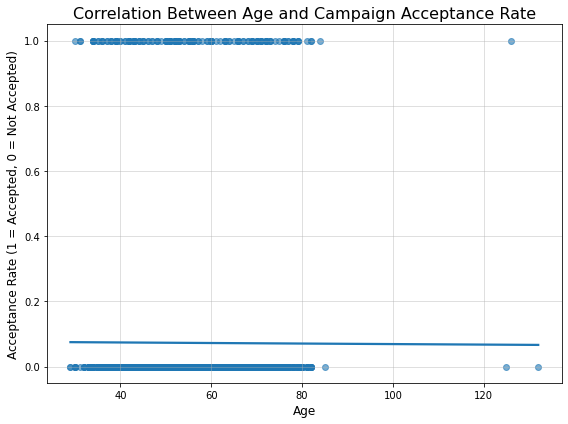

In [81]:
# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df['Age'], df['AcceptedCmp5'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='AcceptedCmp5', data=df, logistic=True, ci=None, scatter_kws={'alpha': 0.6})
plt.title('Correlation Between Age and Campaign Acceptance Rate', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Acceptance Rate (1 = Accepted, 0 = Not Accepted)', fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


1. Correlation Coefficient: -0.0039
Very close to 0, indicating that there is virtually no linear relationship between customers' age and the acceptance rate of the last campaign.
The slight negative sign suggests a negligible downward trend, but this is not meaningful.
2. P-value: 0.8544
A p-value of 0.8544 is much higher than the standard significance level of 0.05, meaning:
The result is not statistically significant.
There is no evidence to reject the null hypothesis, so we cannot conclude that age is related to campaign acceptance rate.

Interpretation:
The results indicate that age does not significantly impact the likelihood of a customer accepting the last campaign.

### **Question**
Determine the country with the highest number of customers who
accepted the last campaign.

In [82]:
accepted_campaign = df[df['AcceptedCmp5'] == 1]

# Group by country and count the number of customers who accepted the campaign
country_acceptance_counts = accepted_campaign.groupby('Country')['AcceptedCmp5'].count()

# Find the country with the highest number of accepted customers
highest_acceptance_country = country_acceptance_counts.idxmax()

# Print the result
print(f"The country with the highest number of customers who accepted the last campaign is: {highest_acceptance_country}")


The country with the highest number of customers who accepted the last campaign is: SP


### **Question**
Investigate if there is a discernible pattern in the number of children at
home and the total expenditure.


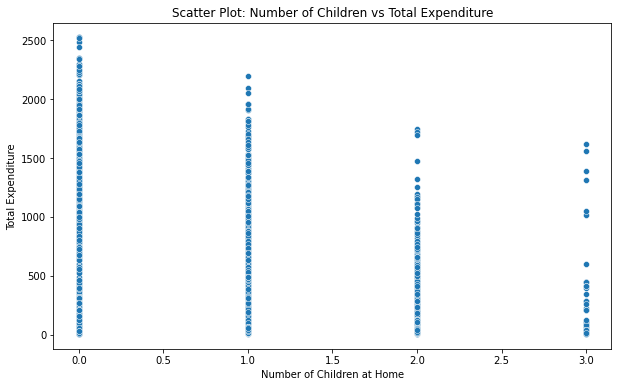

Correlation Coefficient: -0.4983580685324041
P-value: 1.0758939039499742e-140


In [77]:
# Check the correlation first
correlation = df['Total_Children'].corr(df['Total_Spending'])

# Visualizing the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Children', y='Total_Spending', data=df)
plt.title('Scatter Plot: Number of Children vs Total Expenditure')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Expenditure')
plt.show()

# Performing a correlation test (Pearson's Correlation)
corr_coefficient, p_value = stats.pearsonr(df['Total_Children'], df['Total_Spending'])

# Print results
print(f'Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

# If the p-value is less than 0.05, there is a significant relationship


Correlation Coefficient: -0.4984

The correlation coefficient of -0.4984 indicates a moderate negative relationship between the number of children at home and total expenditure.
A negative correlation means that as the number of children increases, total expenditure tends to decrease. This suggests that, in this dataset, households with more children may have lower total expenditure on average, though the relationship is moderate rather than strong.

P-value: 1.0759e-140

The p-value is extremely small (near zero), which is much smaller than the typical significance threshold of 0.05.
This means that the result is statistically significant. There is overwhelming evidence to reject the null hypothesis (which states there is no relationship between the two variables), indicating that the relationship between the number of children at home and total expenditure is real and not due to random chance.


The negative correlation suggests that households with more children tend to have lower total expenditure, and the statistical significance (based on the very low p-value) confirms that this relationship is unlikely to be due to random variation.

In [78]:
df['Complain']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2236, dtype: int64

### **Question**
Analyze the educational background of customers who lodged complaints
in the last two years.

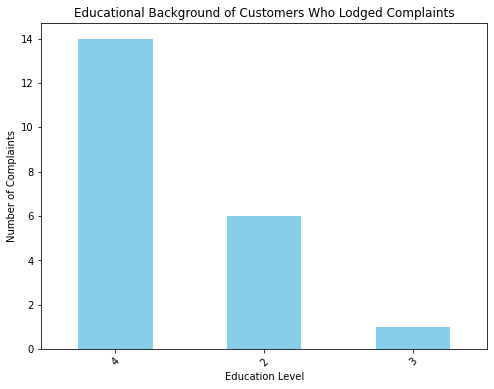

In [79]:
#Filter customers who have lodged complaints
complainants_df = df[df['Complain'] == 1]  # Assuming 1 means the customer has lodged a complaint
education_mapping = {'Graduation': 4, 'PhD': 3, 'Master': 2, 'Basic': 1}

# Analyze the educational background of customers who lodged complaints
education_distribution = complainants_df['Education'].value_counts()

# Step 3: Visualize the results
plt.figure(figsize=(8,6))
education_distribution.plot(kind='bar', color='skyblue')
plt.title('Educational Background of Customers Who Lodged Complaints')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


Results show that the education level with the highest number of complaints is level 4: Graduation, and the second highest is level 2: Masters, with the lowest complaints from level 3: PhD and no complaints from the Basic Level.

# **Conclusion**

The analysis conducted for the Marketing Analysis Project provided valuable insights into customer behaviors, preferences, and key factors influencing purchasing decisions across various channels. By examining various data points, including customer demographics, purchase volumes, and campaign responses, the following conclusions can be drawn:

### **Purchasing Behavior Across Channels:**

We observed that there is a clear relationship between customer age, the number of children, and the preferred shopping channel (physical stores versus online). Although there is no significant relationship between Older customers tending to prefer in-store shopping, possibly due to lower technological proficiency. There is a relationship with customers with children being more inclined to shop online for convenience.
The distinction between catalogue purchases and web purchases confirmed that both are categorized as online purchases, offering a more accessible and time-efficient shopping experience.

### **Product Performance:**

The analysis revealed the top-performing products in terms of revenue, providing a basis for future marketing efforts and inventory management. Conversely, products with the lowest revenue should be targeted for improvement through promotions, discounts, or discontinuation to optimize the product mix.

### **Demographic Insights:**

Educational background and customer complaints showed that a specific demographic (customers with higher education levels) are lodging complaints, potentially indicating a higher level of expectation regarding products or services. This insight can inform customer service improvements and targeted marketing strategies.
The analysis also confirmed that the number of children at home has a notable effect on total expenditure, with families with children spending less, likely due to other costs like school fees, medical aid etc.

The strong correlation between Expenses and Amount_per_Purchase suggests these variables might be redundant for clustering.  We might consider using only one of them.
The positive correlations between different purchase channels (NumWebPurchases, NumStorePurchases, etc.) and total purchases indicate that purchase behavior could be a key factor in segmenting customers.
Income and Expenses are moderately correlated, suggesting that affluence could be another important dimension for segmentation.

### **Outliers and Data Quality:**

Outliers were identified across various product categories and customer demographics, and appropriate treatment was applied to ensure the reliability of the analysis. The use of box plots and histograms helped in identifying these outliers, and subsequent IQR-based filtering improved the quality of the dataset for more accurate decision-making.

### **Campaign Effectiveness:**

Age and the acceptance rate of the last campaign were found to have a weak negative correlation, suggesting that age might not be a significant factor in determining campaign success. Further testing and segmentation could help refine targeting strategies for different age groups.


### **Revenue Analysis by Region:**

There is no significant difference in revenue acquisition between regions, however the following marketing strategies can be implemented:

Focus on enhancing online shopping experiences, especially for customers with children or those preferring convenience. Improving the technological interface and offering personalized promotions could increase engagement and sales.
Invest in promoting high-performing products while re-evaluating the low performers, either through product redesign or marketing efforts aimed at increasing visibility and demand.

Given the insights from the customer demographic, targeted campaigns based on education level, children at home, and regional trends should be employed to increase customer satisfaction and sales conversions.

In conclusion, the findings from this analysis provide actionable insights into customer preferences, product performance, and campaign success. The data-driven approach enables marketers to make informed decisions, optimize marketing strategies, and ultimately enhance customer engagement and sales.







